# Visualisations Finales - SDG 6.4.1 Tunisie

**Objectif**: Créer toutes les visualisations pour la présentation et le rapport final

## Contenu du Notebook

### 📊 **Partie 1 : Synthèse Nationale (2018-2023)**
1. Tableau récapitulatif SDG 6.4.1
2. Évolution temporelle AWP (3 méthodes)
3. Tendances GVA et volumes d'eau
4. Comparaison méthodes (convergence)

### 🗺️ **Partie 2 : Analyse Spatiale (2022)**
5. Carte surfaces irriguées par gouvernorat
6. Cartes choroplèthes AWP (ETb, AWP_we, AWP_wp1)
7. Top 10 / Bottom 10 gouvernorats
8. Analyse régionale (Nord/Centre/Sud)

### 📈 **Partie 3 : Contexte Hydro-Agricole**
9. Efficacité irrigation par gouvernorat
10. Productivité biomasse (WPb)
11. Relation AWP vs Surfaces irriguées
12. Disparités spatiales

### 🎯 **Partie 4 : Synthèse et Recommandations**
13. Dashboard récapitulatif
14. Hotspots performance
15. Recommandations par région
16. Export pour rapport

---

**Données sources** :
- Notebook 05 : AWP national (2018-2023)
- Notebook 06 : AWP par gouvernorat (2022)
- Rasters : ETb, WPb
- Statistiques : temporal_statistics.csv

In [ ]:
## 1. Imports et Configuration

In [1]:
# Imports
import sys
sys.path.append('../src')

import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle, Patch
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# Configuration visualisations haute qualité
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

# Couleurs personnalisées
COLORS = {
    'aquastat': '#2E86AB',  # Bleu
    'satellite': '#F77F00',  # Orange
    'biomass': '#06A77D',    # Vert
    'gva': '#D62828',        # Rouge
    'water': '#118AB2',      # Bleu clair
    'nord': '#457B9D',
    'centre': '#F4A261',
    'sud': '#E76F51'
}

print("✓ Modules importés")
print("✓ Configuration visualisations: DPI 150 (écran), 300 (export)")

✓ Modules importés
✓ Configuration visualisations: DPI 150 (écran), 300 (export)


## 2. Charger Toutes les Données

In [2]:
# Créer répertoires pour exports
os.makedirs("../results/presentation", exist_ok=True)
os.makedirs("../results/report", exist_ok=True)

# 1. Données AWP nationales (2018-2023)
df_national = pd.read_csv("../data/processed/awp_results.csv")
print("✓ AWP national chargé:")
print(f"  Années: {df_national['year'].min()}-{df_national['year'].max()}")
print(f"  Variables: {list(df_national.columns)}")

# 2. Données AWP par gouvernorat (2022)
df_gouvernorat = pd.read_csv("../data/processed/awp_by_governorate.csv")
gdf_gouvernorat = gpd.read_file("../data/processed/awp_by_governorate.gpkg")
print(f"\n✓ AWP gouvernorat chargé:")
print(f"  Gouvernorats: {len(df_gouvernorat)}")
print(f"  Année: 2022")

# 3. Statistiques temporelles
df_stats = pd.read_csv("../data/processed/temporal_statistics.csv")
print(f"\n✓ Statistiques temporelles chargées:")
print(f"  Années: {df_stats['year'].min()}-{df_stats['year'].max()}")

# 4. AQUASTAT
df_aquastat = pd.read_csv("../data/external/aquastat_tunisia_clean.csv")
print(f"\n✓ AQUASTAT chargé")

print("\n" + "="*60)
print("📊 Toutes les données prêtes pour visualisation")
print("="*60)

✓ AWP national chargé:
  Années: 2018-2023
  Variables: ['year', 'A_we', 'A_wp1', 'A_wp2', 'V_a', 'V_ETb', 'GVA_a', 'c_r', 'WPb_mean', 'irrigation_efficiency']

✓ AWP gouvernorat chargé:
  Gouvernorats: 17
  Année: 2022

✓ Statistiques temporelles chargées:
  Années: 2018-2023

✓ AQUASTAT chargé

📊 Toutes les données prêtes pour visualisation

✓ AWP gouvernorat chargé:
  Gouvernorats: 17
  Année: 2022

✓ Statistiques temporelles chargées:
  Années: 2018-2023

✓ AQUASTAT chargé

📊 Toutes les données prêtes pour visualisation


# PARTIE 1 : SYNTHÈSE NATIONALE

---

## 3. Tableau Récapitulatif SDG 6.4.1

💾 Tableau sauvegardé


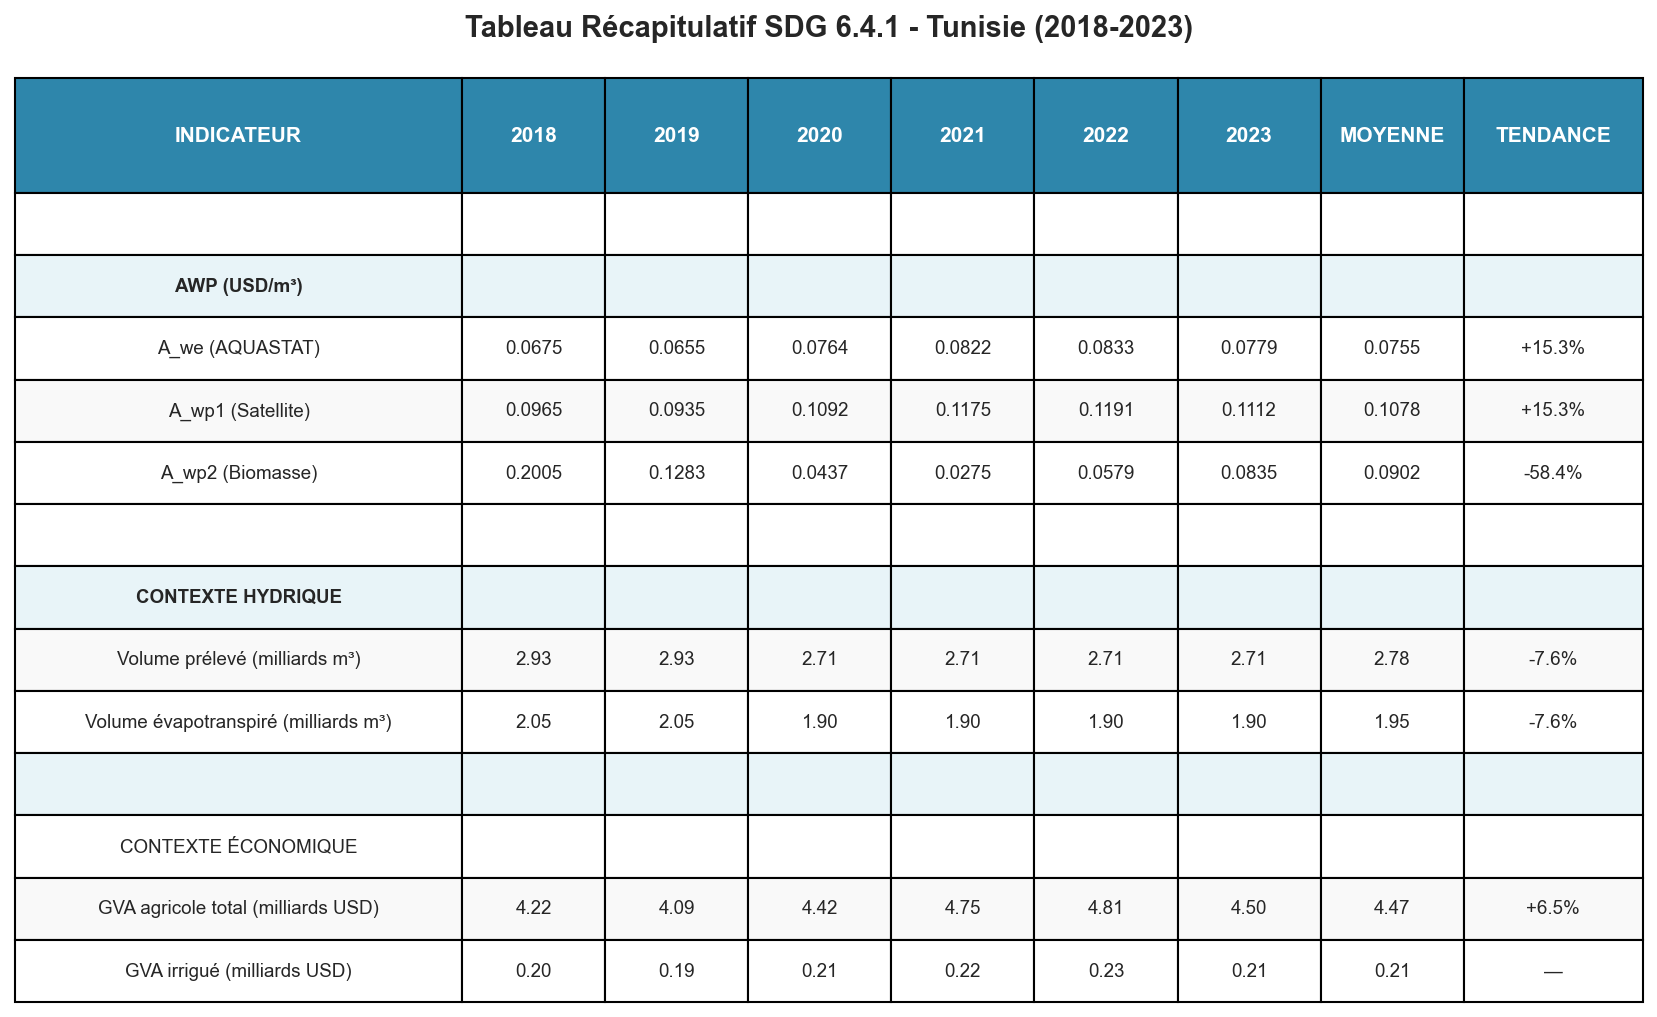

In [3]:
# Créer tableau récapitulatif professionnel
fig, ax = plt.subplots(figsize=(14, 8))
ax.axis('tight')
ax.axis('off')

# Préparer données tableau
data = []
data.append(['INDICATEUR', '2018', '2019', '2020', '2021', '2022', '2023', 'MOYENNE', 'TENDANCE'])
data.append(['', '', '', '', '', '', '', '', ''])

# AWP
for idx, row in df_national.iterrows():
    if idx == 0:
        data.append(['AWP (USD/m³)', '', '', '', '', '', '', '', ''])
for metric, name in [('A_we', 'A_we (AQUASTAT)'), ('A_wp1', 'A_wp1 (Satellite)'), ('A_wp2', 'A_wp2 (Biomasse)')]:
    row_data = [name]
    for year in range(2018, 2024):
        val = df_national[df_national['year']==year][metric].values[0]
        row_data.append(f'{val:.4f}')
    row_data.append(f"{df_national[metric].mean():.4f}")
    trend = ((df_national[metric].iloc[-1] / df_national[metric].iloc[0]) - 1) * 100
    row_data.append(f'{trend:+.1f}%')
    data.append(row_data)

data.append(['', '', '', '', '', '', '', '', ''])

# Contexte hydrique
data.append(['CONTEXTE HYDRIQUE', '', '', '', '', '', '', '', ''])
for metric, name, unit in [('V_a', 'Volume prélevé', 'milliards m³'), ('V_ETb', 'Volume évapotranspiré', 'milliards m³')]:
    row_data = [f'{name} ({unit})']
    for year in range(2018, 2024):
        val = df_national[df_national['year']==year][metric].values[0] / 1e9
        row_data.append(f'{val:.2f}')
    row_data.append(f"{(df_national[metric].mean()/1e9):.2f}")
    trend = ((df_national[metric].iloc[-1] / df_national[metric].iloc[0]) - 1) * 100
    row_data.append(f'{trend:+.1f}%')
    data.append(row_data)

data.append(['', '', '', '', '', '', '', '', ''])

# Contexte économique
data.append(['CONTEXTE ÉCONOMIQUE', '', '', '', '', '', '', '', ''])
metric = 'GVA_a'
row_data = ['GVA agricole total (milliards USD)']
for year in range(2018, 2024):
    val = df_national[df_national['year']==year][metric].values[0] / 1e9
    row_data.append(f'{val:.2f}')
row_data.append(f"{(df_national[metric].mean()/1e9):.2f}")
trend = ((df_national[metric].iloc[-1] / df_national[metric].iloc[0]) - 1) * 100
row_data.append(f'{trend:+.1f}%')
data.append(row_data)

# GVA irrigué
row_data = ['GVA irrigué (milliards USD)']
for year in range(2018, 2024):
    gva = df_national[df_national['year']==year]['GVA_a'].values[0]
    cr = df_national[df_national['year']==year]['c_r'].values[0]
    val = (gva * (1 - cr)) / 1e9
    row_data.append(f'{val:.2f}')
gva_mean = df_national['GVA_a'].mean() * (1 - df_national['c_r'].mean()) / 1e9
row_data.append(f"{gva_mean:.2f}")
row_data.append('—')
data.append(row_data)

# Créer tableau
table = ax.table(cellText=data, cellLoc='center', loc='center',
                colWidths=[0.25] + [0.08]*7 + [0.10],
                bbox=[0, 0, 1, 1])

# Styling
table.auto_set_font_size(False)
table.set_fontsize(9)

# Header
for i in range(9):
    cell = table[(0, i)]
    cell.set_facecolor('#2E86AB')
    cell.set_text_props(weight='bold', color='white', fontsize=10)
    cell.set_height(0.05)

# Section headers
for row_idx in [2, 7, 10]:
    for col_idx in range(9):
        cell = table[(row_idx, col_idx)]
        cell.set_facecolor('#E8F4F8')
        cell.set_text_props(weight='bold', fontsize=9)

# Alternate row colors
for row in range(1, len(data)):
    if row not in [2, 7, 10] and data[row][0] != '':
        color = '#F9F9F9' if row % 2 == 0 else 'white'
        for col in range(9):
            table[(row, col)].set_facecolor(color)

plt.title('Tableau Récapitulatif SDG 6.4.1 - Tunisie (2018-2023)', 
         fontsize=14, fontweight='bold', pad=20)

plt.savefig('../results/presentation/01_tableau_sdg641.png', dpi=300, bbox_inches='tight')
plt.savefig('../results/report/01_tableau_sdg641.png', dpi=300, bbox_inches='tight')
print("💾 Tableau sauvegardé")
plt.show()

## 4. Dashboard National - 6 Panels

💾 Dashboard national sauvegardé


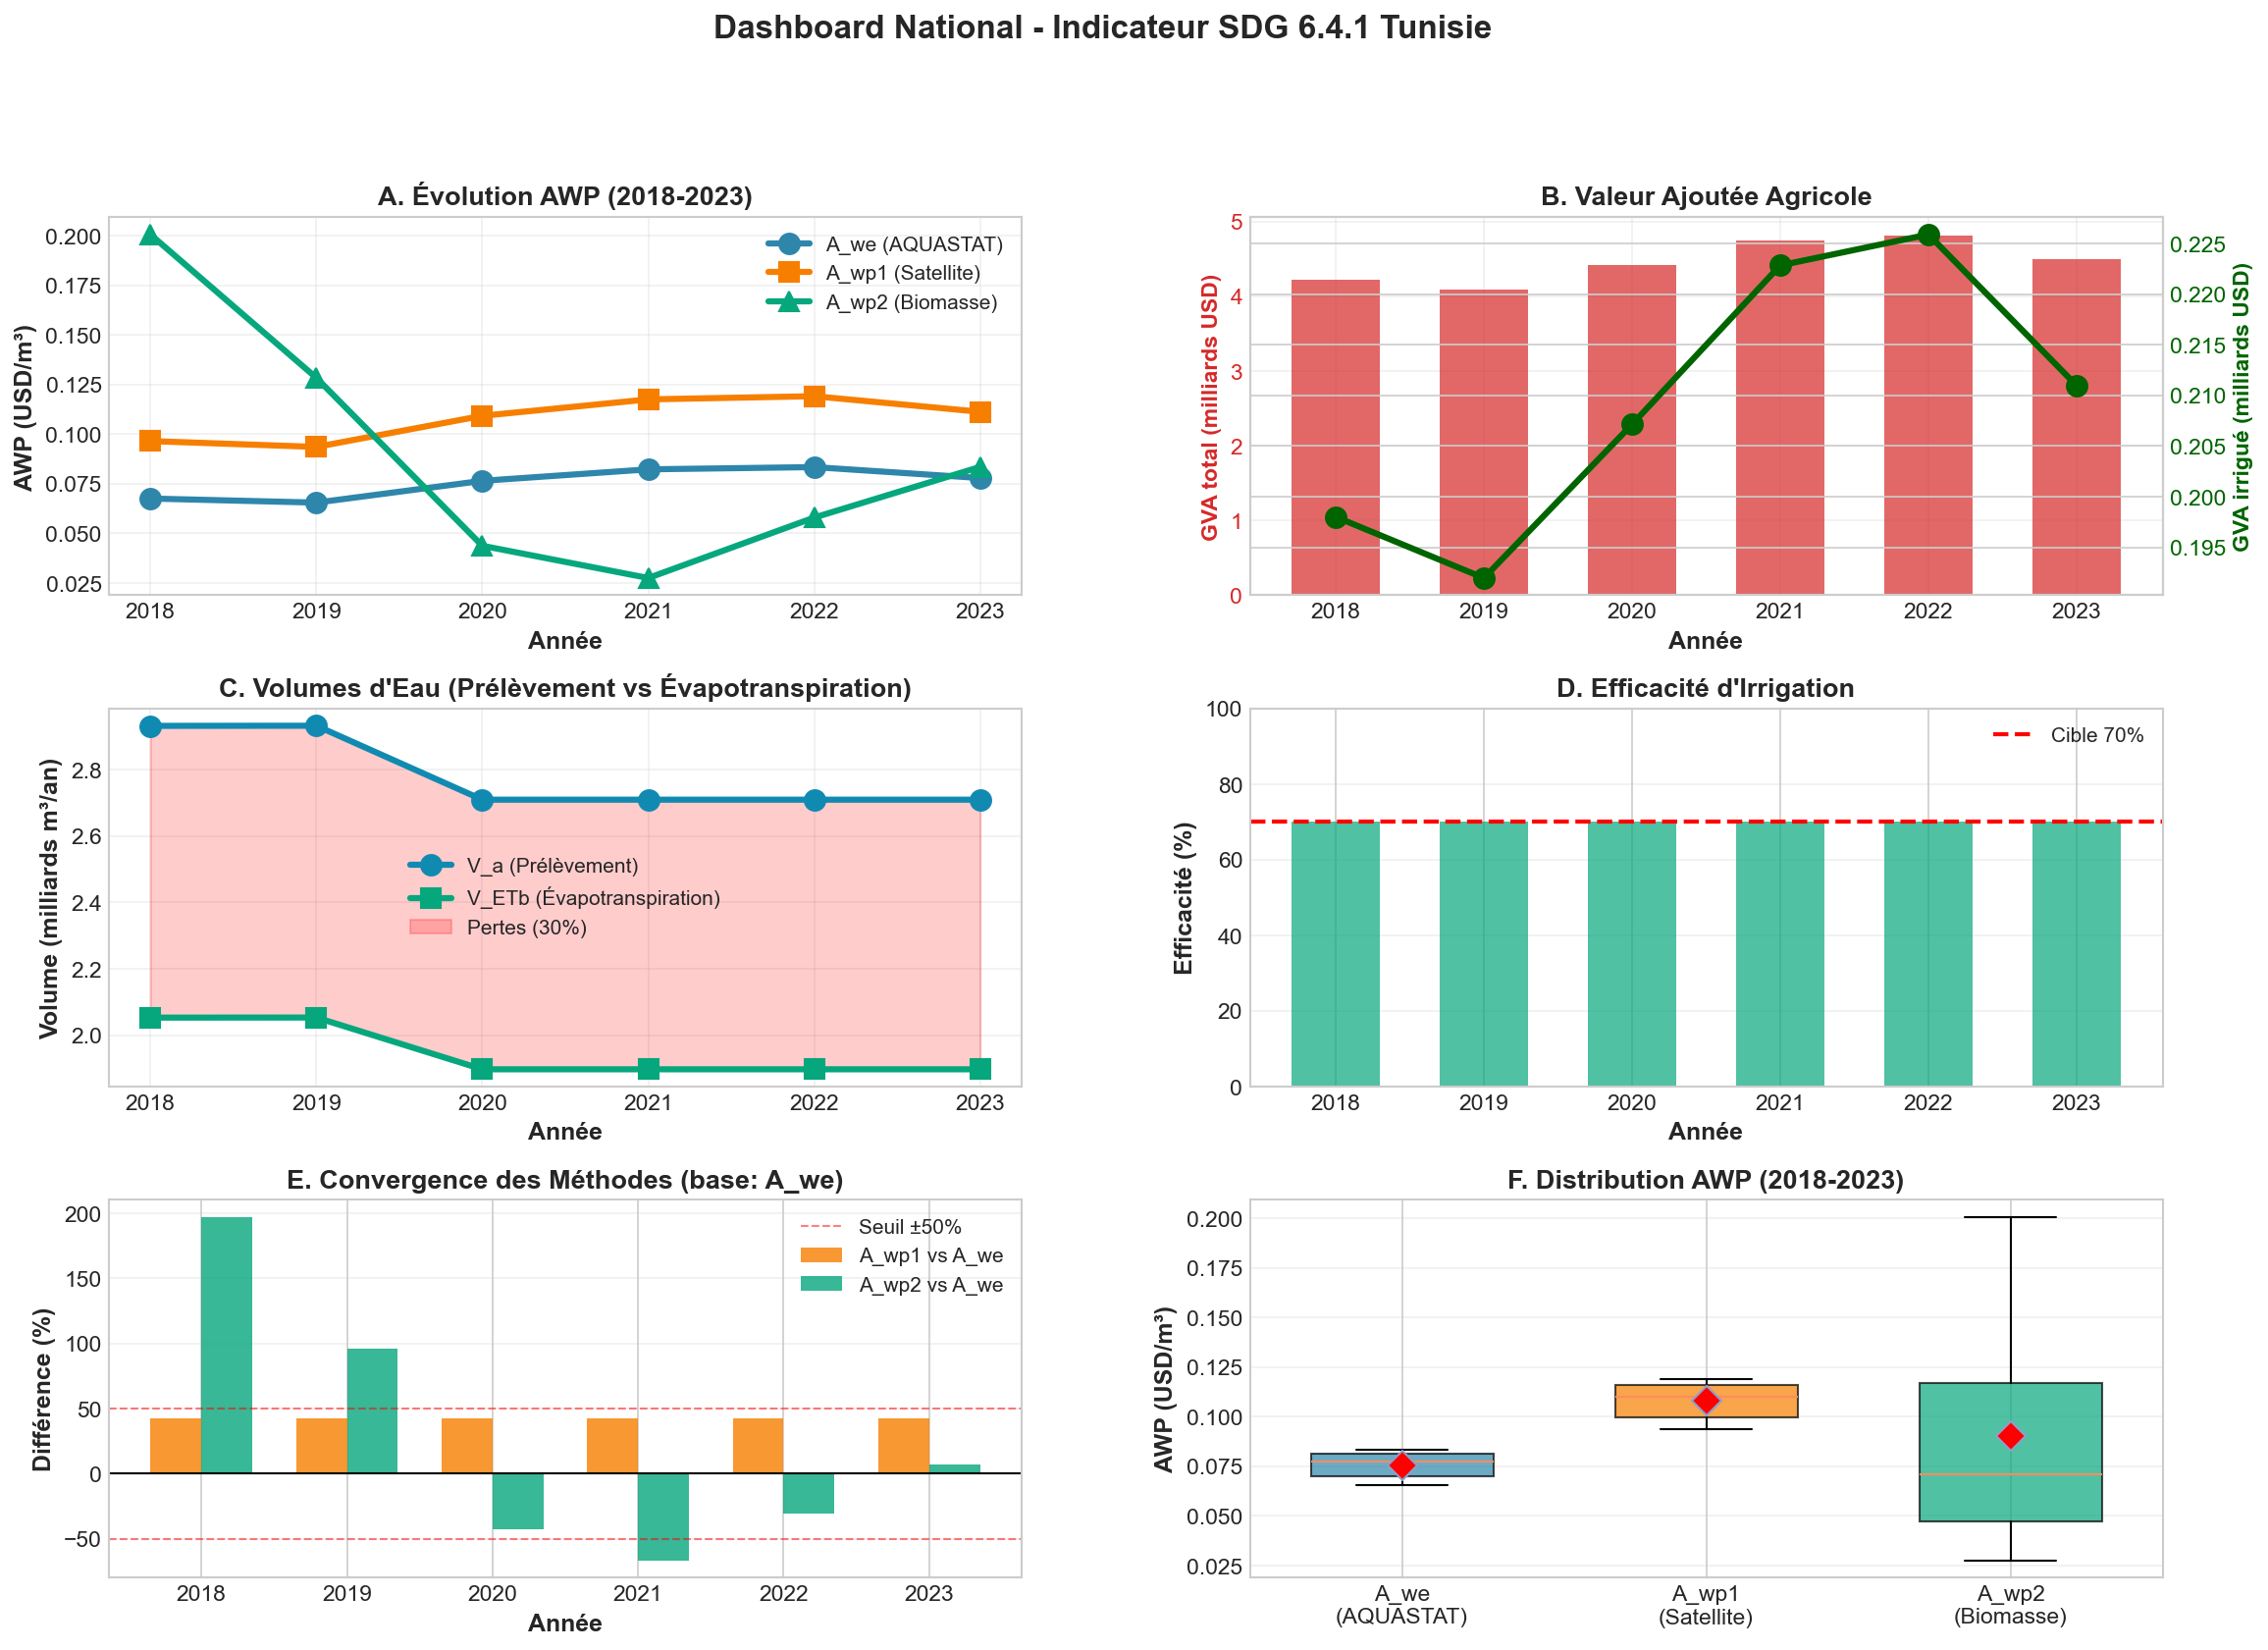

In [4]:
# Dashboard complet 6 panels pour présentation
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(3, 2, figure=fig, hspace=0.3, wspace=0.25)

# Panel 1: Évolution AWP (3 méthodes)
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(df_national['year'], df_national['A_we'], 'o-', 
        linewidth=3, markersize=10, label='A_we (AQUASTAT)', color=COLORS['aquastat'])
ax1.plot(df_national['year'], df_national['A_wp1'], 's-', 
        linewidth=3, markersize=10, label='A_wp1 (Satellite)', color=COLORS['satellite'])
ax1.plot(df_national['year'], df_national['A_wp2'], '^-', 
        linewidth=3, markersize=10, label='A_wp2 (Biomasse)', color=COLORS['biomass'])
ax1.set_xlabel('Année', fontsize=12, fontweight='bold')
ax1.set_ylabel('AWP (USD/m³)', fontsize=12, fontweight='bold')
ax1.set_title('A. Évolution AWP (2018-2023)', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10, loc='best')
ax1.grid(True, alpha=0.3)

# Panel 2: GVA Agricole
ax2 = fig.add_subplot(gs[0, 1])
ax2_twin = ax2.twinx()
bars = ax2.bar(df_national['year'], df_national['GVA_a']/1e9, 
              alpha=0.7, color=COLORS['gva'], width=0.6, label='GVA total')
gva_irrig = df_national['GVA_a'] * (1 - df_national['c_r']) / 1e9
line = ax2_twin.plot(df_national['year'], gva_irrig, 'o-', 
                     color='darkgreen', linewidth=3, markersize=10, label='GVA irrigué')
ax2.set_xlabel('Année', fontsize=12, fontweight='bold')
ax2.set_ylabel('GVA total (milliards USD)', fontsize=11, fontweight='bold', color=COLORS['gva'])
ax2_twin.set_ylabel('GVA irrigué (milliards USD)', fontsize=11, fontweight='bold', color='darkgreen')
ax2.set_title('B. Valeur Ajoutée Agricole', fontsize=13, fontweight='bold')
ax2.tick_params(axis='y', labelcolor=COLORS['gva'])
ax2_twin.tick_params(axis='y', labelcolor='darkgreen')
ax2.grid(True, alpha=0.3)

# Panel 3: Volumes d'eau
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(df_national['year'], df_national['V_a']/1e9, 'o-',
        linewidth=3, markersize=10, label='V_a (Prélèvement)', color='#118AB2')
ax3.plot(df_national['year'], df_national['V_ETb']/1e9, 's-',
        linewidth=3, markersize=10, label='V_ETb (Évapotranspiration)', color='#06A77D')
ax3.fill_between(df_national['year'], df_national['V_ETb']/1e9, df_national['V_a']/1e9,
                alpha=0.2, color='red', label='Pertes (30%)')
ax3.set_xlabel('Année', fontsize=12, fontweight='bold')
ax3.set_ylabel('Volume (milliards m³/an)', fontsize=12, fontweight='bold')
ax3.set_title('C. Volumes d\'Eau (Prélèvement vs Évapotranspiration)', fontsize=13, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

# Panel 4: Efficacité irrigation
ax4 = fig.add_subplot(gs[1, 1])
efficiency = (df_national['V_ETb'] / df_national['V_a']) * 100
ax4.bar(df_national['year'], efficiency, alpha=0.7, color='#06A77D', width=0.6)
ax4.axhline(y=70, color='red', linestyle='--', linewidth=2, label='Cible 70%')
ax4.set_xlabel('Année', fontsize=12, fontweight='bold')
ax4.set_ylabel('Efficacité (%)', fontsize=12, fontweight='bold')
ax4.set_title('D. Efficacité d\'Irrigation', fontsize=13, fontweight='bold')
ax4.set_ylim(0, 100)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')

# Panel 5: Convergence méthodes
ax5 = fig.add_subplot(gs[2, 0])
diff_wp1 = ((df_national['A_wp1'] / df_national['A_we']) - 1) * 100
diff_wp2 = ((df_national['A_wp2'] / df_national['A_we']) - 1) * 100
x = np.arange(len(df_national))
width = 0.35
ax5.bar(x - width/2, diff_wp1, width, alpha=0.8, label='A_wp1 vs A_we', color=COLORS['satellite'])
ax5.bar(x + width/2, diff_wp2, width, alpha=0.8, label='A_wp2 vs A_we', color=COLORS['biomass'])
ax5.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax5.axhline(y=50, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Seuil ±50%')
ax5.axhline(y=-50, color='red', linestyle='--', linewidth=1, alpha=0.5)
ax5.set_xlabel('Année', fontsize=12, fontweight='bold')
ax5.set_ylabel('Différence (%)', fontsize=12, fontweight='bold')
ax5.set_title('E. Convergence des Méthodes (base: A_we)', fontsize=13, fontweight='bold')
ax5.set_xticks(x)
ax5.set_xticklabels(df_national['year'])
ax5.legend(fontsize=10)
ax5.grid(True, alpha=0.3, axis='y')

# Panel 6: Box plots comparaison
ax6 = fig.add_subplot(gs[2, 1])
data_box = [df_national['A_we'], df_national['A_wp1'], df_national['A_wp2']]
bp = ax6.boxplot(data_box, labels=['A_we\n(AQUASTAT)', 'A_wp1\n(Satellite)', 'A_wp2\n(Biomasse)'],
                patch_artist=True, widths=0.6, showmeans=True,
                meanprops=dict(marker='D', markerfacecolor='red', markersize=10))
colors_box = [COLORS['aquastat'], COLORS['satellite'], COLORS['biomass']]
for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax6.set_ylabel('AWP (USD/m³)', fontsize=12, fontweight='bold')
ax6.set_title('F. Distribution AWP (2018-2023)', fontsize=13, fontweight='bold')
ax6.grid(True, alpha=0.3, axis='y')

plt.suptitle('Dashboard National - Indicateur SDG 6.4.1 Tunisie', 
            fontsize=16, fontweight='bold', y=0.995)

plt.savefig('../results/presentation/02_dashboard_national.png', dpi=300, bbox_inches='tight')
plt.savefig('../results/report/02_dashboard_national.png', dpi=300, bbox_inches='tight')
print("💾 Dashboard national sauvegardé")
plt.show()

# PARTIE 2 : ANALYSE SPATIALE

---

## 5. Cartes Choroplèthes AWP par Gouvernorat

💾 Cartes gouvernorats sauvegardées


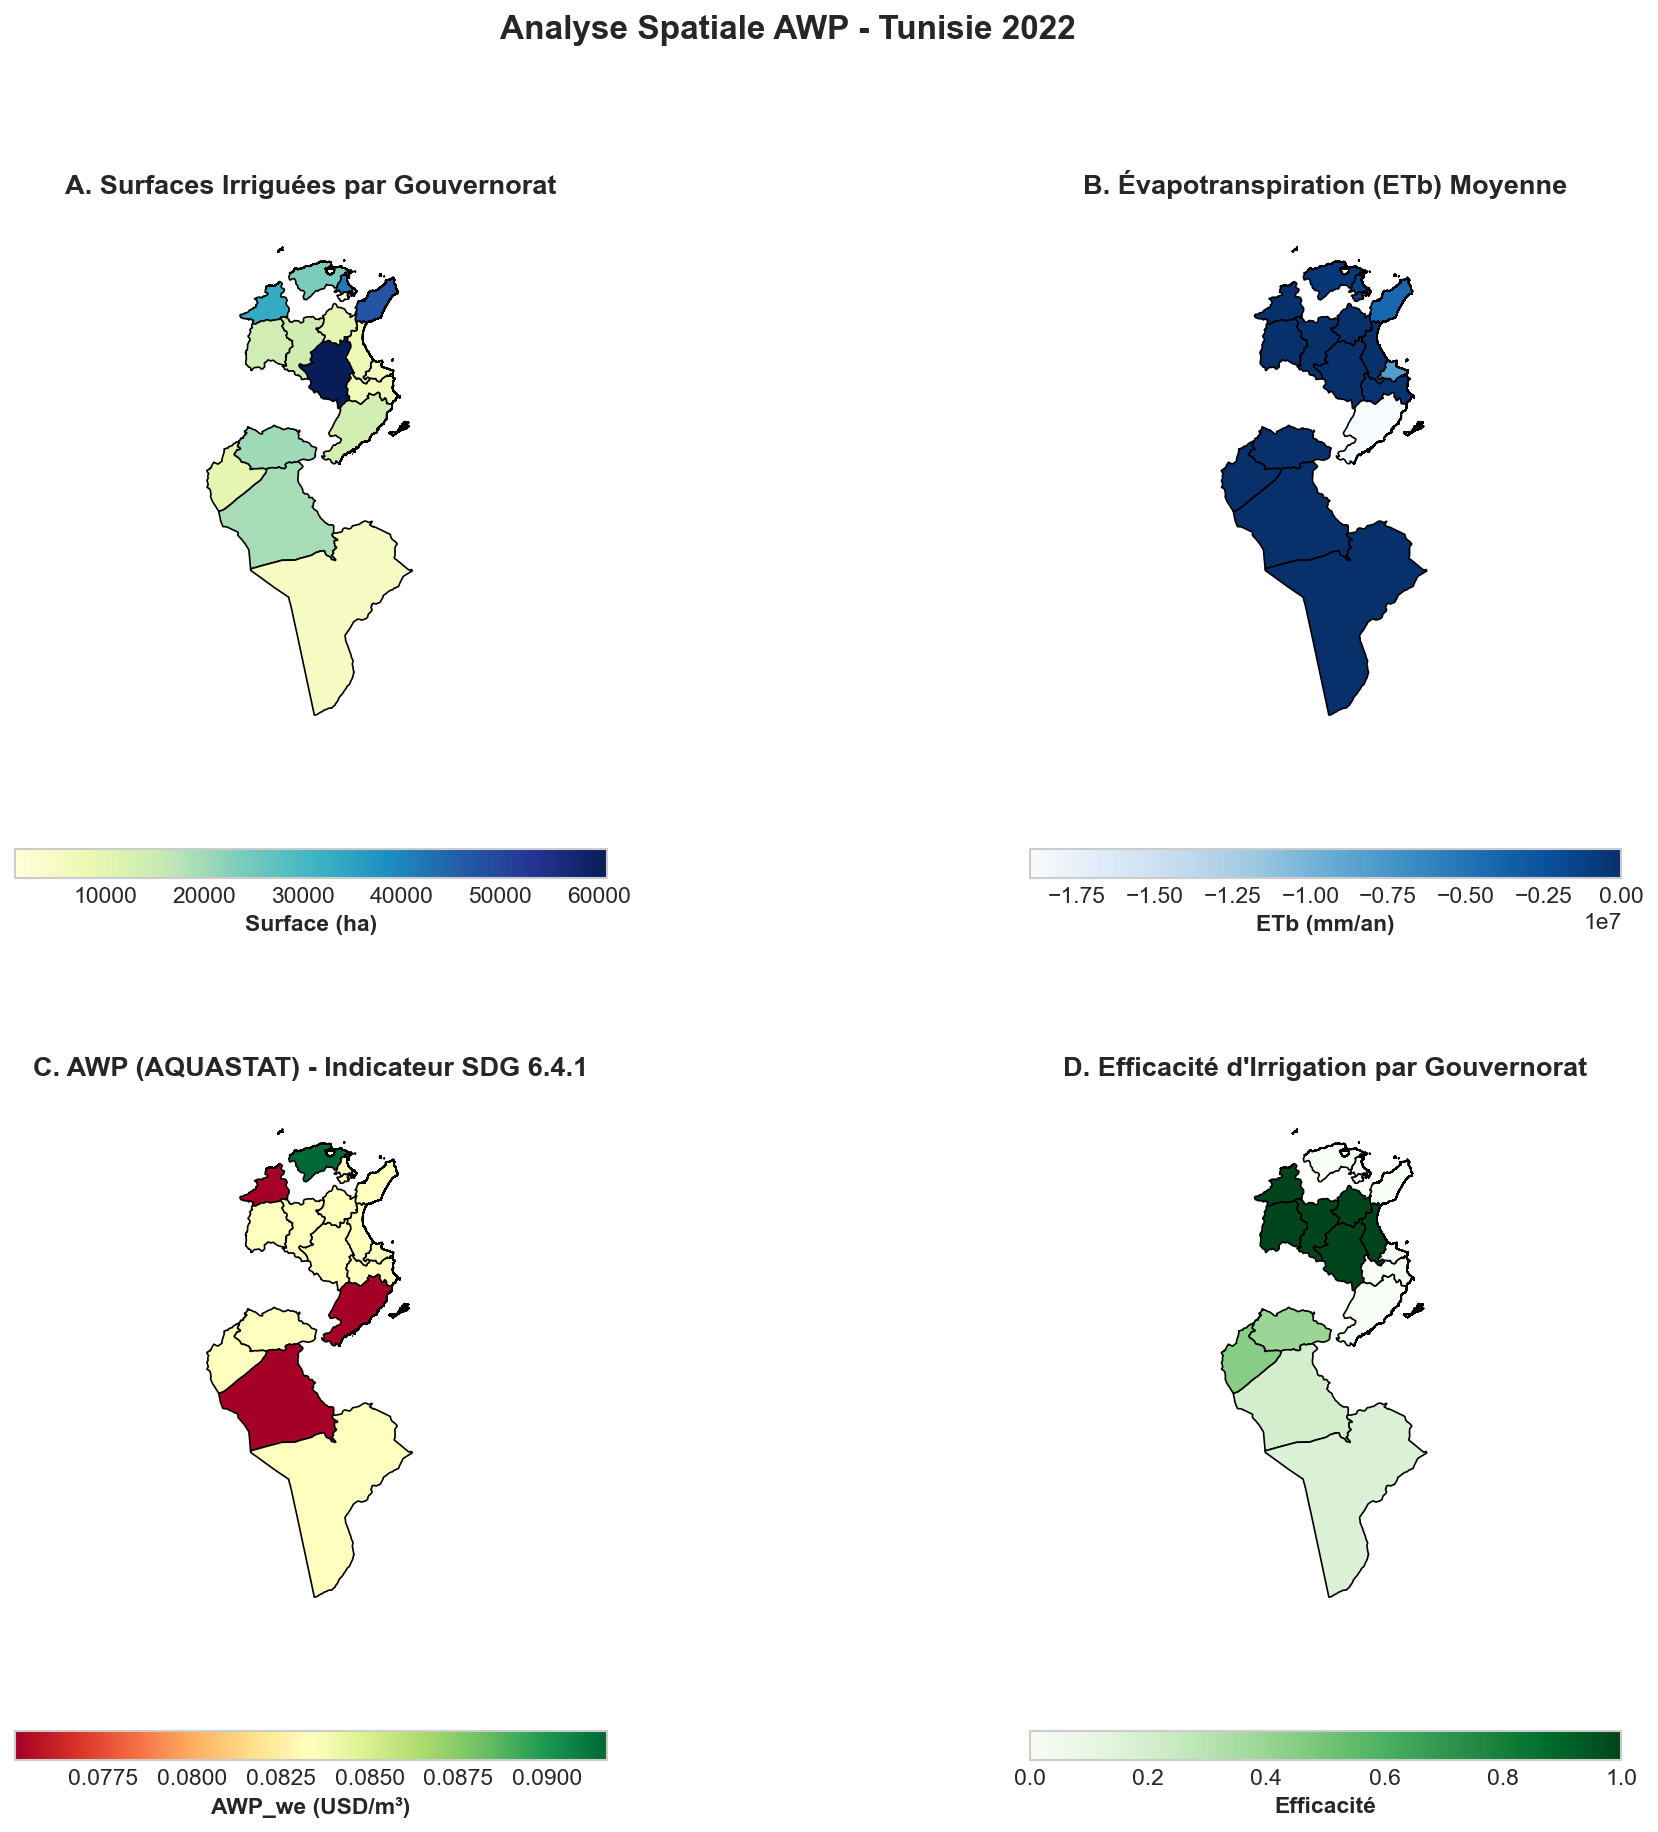

In [5]:
# Cartes choroplèthes haute qualité pour rapport
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# 1. Surfaces irriguées
ax1 = axes[0, 0]
gdf_gouvernorat.plot(
    column='area_irrigated_ha',
    ax=ax1,
    legend=True,
    cmap='YlGnBu',
    edgecolor='black',
    linewidth=0.8,
    legend_kwds={'label': 'Surface (ha)', 'shrink': 0.7, 'orientation': 'horizontal'}
)
ax1.set_title('A. Surfaces Irriguées par Gouvernorat', fontsize=13, fontweight='bold', pad=15)
ax1.axis('off')

# 2. ETb moyen
ax2 = axes[0, 1]
gdf_gouvernorat.plot(
    column='etb_mean',
    ax=ax2,
    legend=True,
    cmap='Blues',
    edgecolor='black',
    linewidth=0.8,
    legend_kwds={'label': 'ETb (mm/an)', 'shrink': 0.7, 'orientation': 'horizontal'}
)
ax2.set_title('B. Évapotranspiration (ETb) Moyenne', fontsize=13, fontweight='bold', pad=15)
ax2.axis('off')

# 3. AWP_we
ax3 = axes[1, 0]
gdf_gouvernorat.plot(
    column='awp_we',
    ax=ax3,
    legend=True,
    cmap='RdYlGn',
    edgecolor='black',
    linewidth=0.8,
    legend_kwds={'label': 'AWP_we (USD/m³)', 'shrink': 0.7, 'orientation': 'horizontal'}
)
ax3.set_title('C. AWP (AQUASTAT) - Indicateur SDG 6.4.1', fontsize=13, fontweight='bold', pad=15)
ax3.axis('off')

# 4. Efficacité irrigation
ax4 = axes[1, 1]
gdf_gouvernorat.plot(
    column='irrigation_efficiency',
    ax=ax4,
    legend=True,
    cmap='Greens',
    edgecolor='black',
    linewidth=0.8,
    vmin=0, vmax=1,
    legend_kwds={'label': 'Efficacité', 'shrink': 0.7, 'orientation': 'horizontal'}
)
ax4.set_title('D. Efficacité d\'Irrigation par Gouvernorat', fontsize=13, fontweight='bold', pad=15)
ax4.axis('off')

plt.suptitle('Analyse Spatiale AWP - Tunisie 2022', fontsize=16, fontweight='bold', y=0.98)
plt.savefig('../results/presentation/03_cartes_gouvernorats.png', dpi=300, bbox_inches='tight')
plt.savefig('../results/report/03_cartes_gouvernorats.png', dpi=300, bbox_inches='tight')
print("💾 Cartes gouvernorats sauvegardées")
plt.show()

## 6. Top/Bottom Gouvernorats et Analyse Régionale

💾 Analyse top/régions sauvegardée


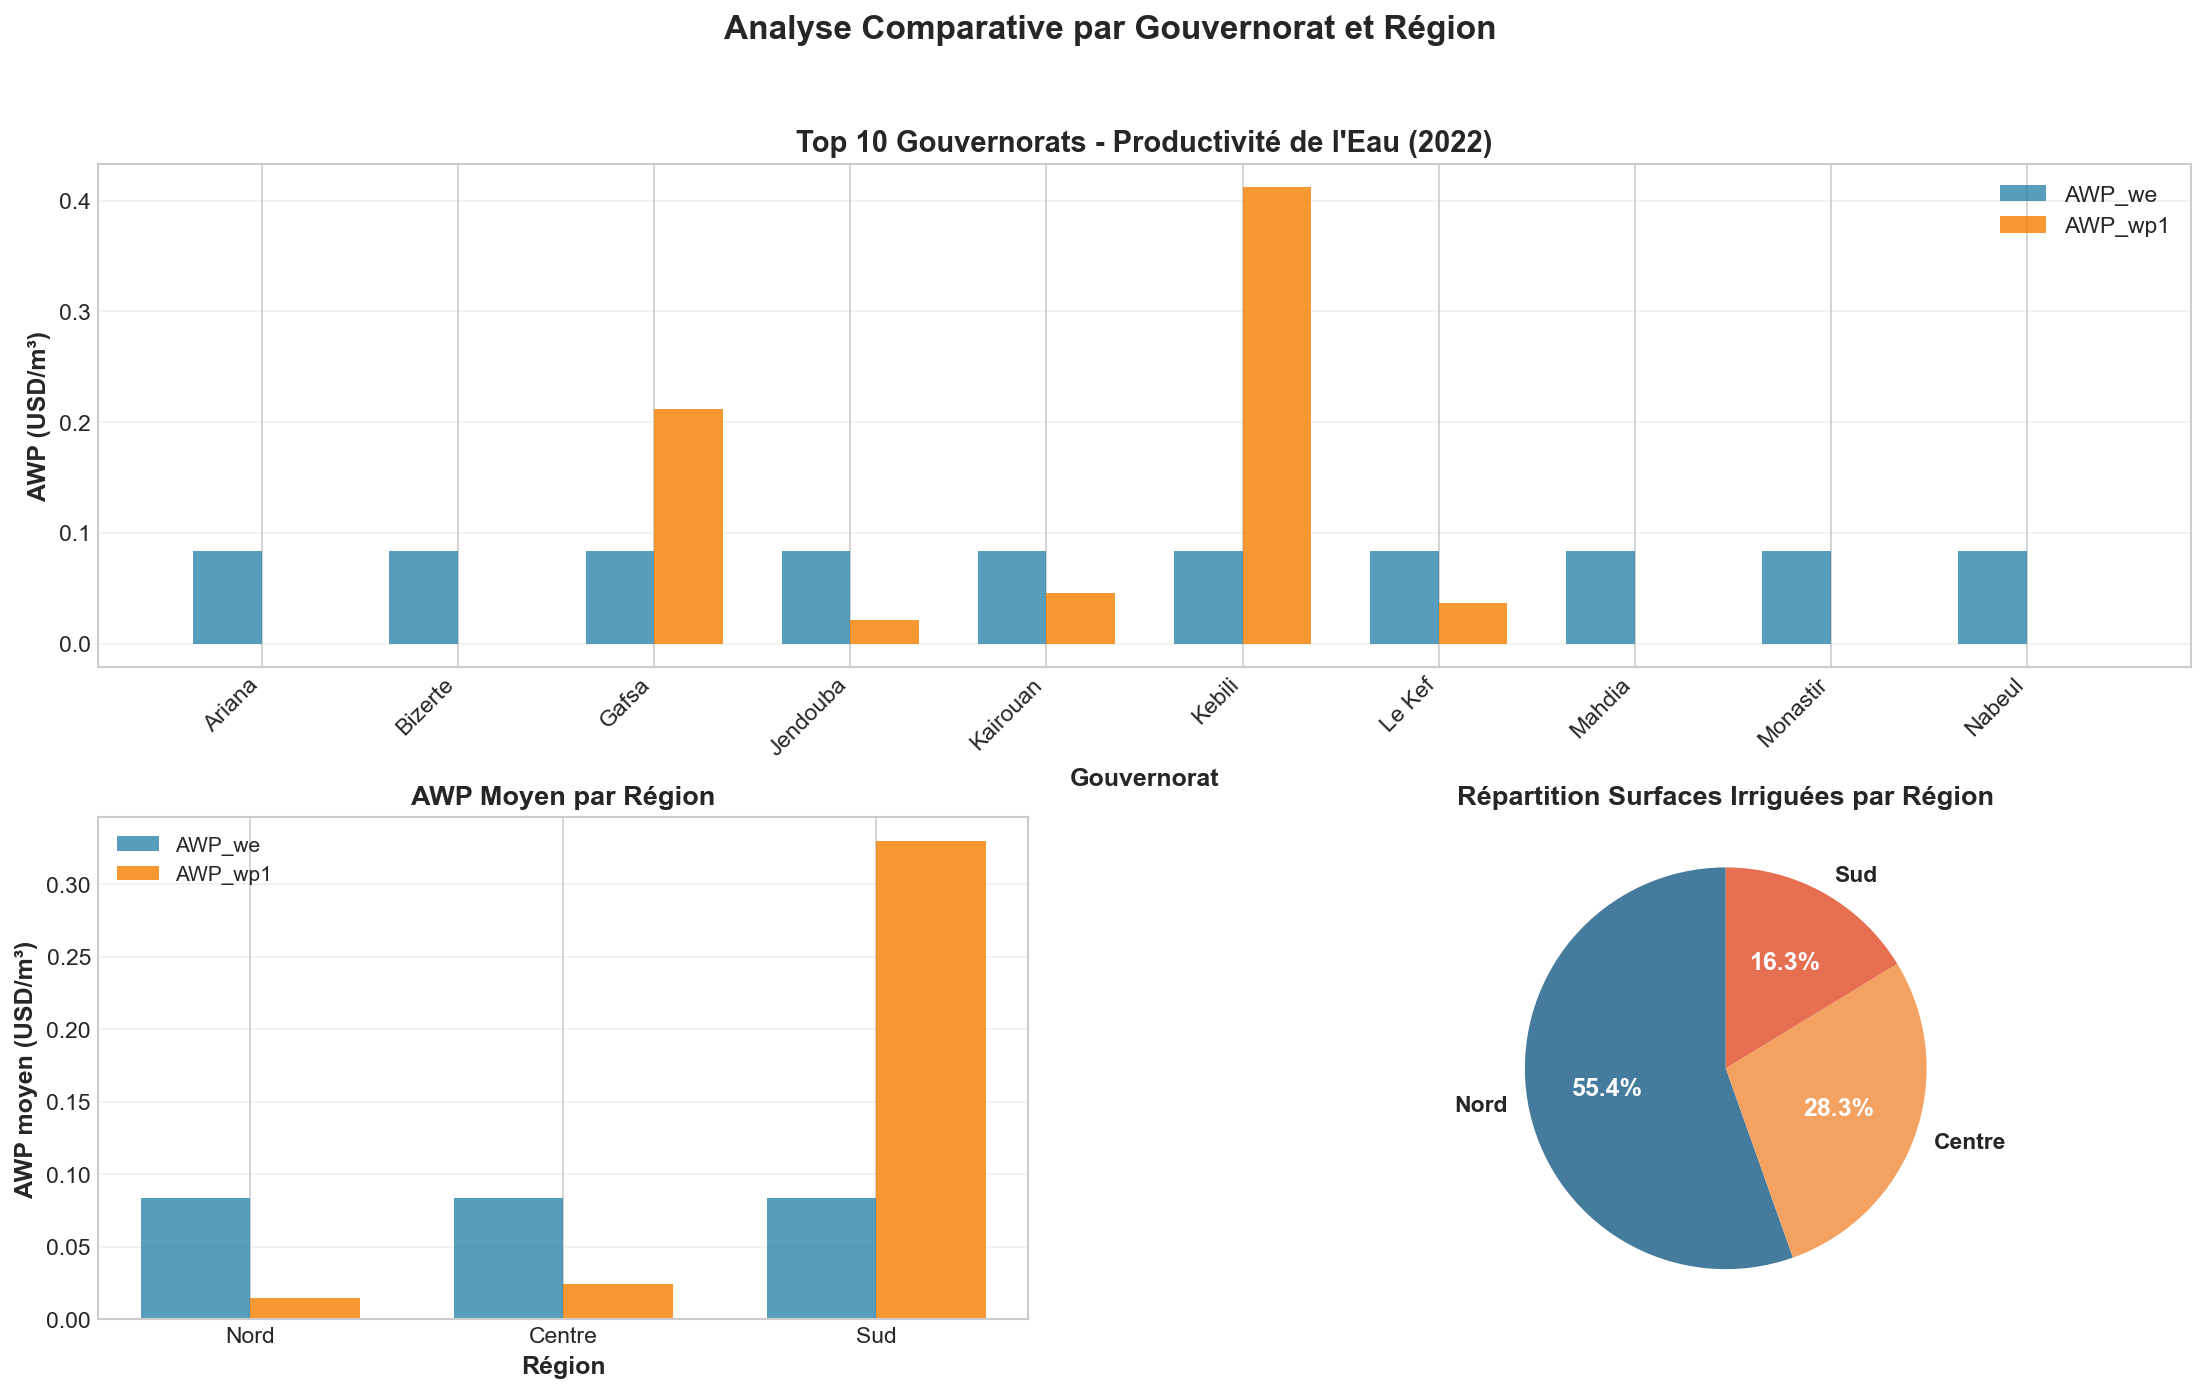

In [6]:
# Figure combinée Top/Bottom + Régions
fig = plt.figure(figsize=(18, 10))
gs = GridSpec(2, 2, figure=fig, hspace=0.3, wspace=0.25)

# Top 10 gouvernorats
ax1 = fig.add_subplot(gs[0, :])
top10 = df_gouvernorat.sort_values('awp_we', ascending=False).head(10)
x = np.arange(len(top10))
width = 0.35
ax1.bar(x - width/2, top10['awp_we'], width, alpha=0.8, label='AWP_we', color=COLORS['aquastat'])
ax1.bar(x + width/2, top10['awp_wp1'], width, alpha=0.8, label='AWP_wp1', color=COLORS['satellite'])
ax1.set_xlabel('Gouvernorat', fontsize=12, fontweight='bold')
ax1.set_ylabel('AWP (USD/m³)', fontsize=12, fontweight='bold')
ax1.set_title('Top 10 Gouvernorats - Productivité de l\'Eau (2022)', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(top10['governorate'], rotation=45, ha='right')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3, axis='y')

# Analyse régionale - Bar chart
ax2 = fig.add_subplot(gs[1, 0])
regional_awp = df_gouvernorat.groupby('region').agg({
    'awp_we': 'mean',
    'awp_wp1': 'mean',
    'area_irrigated_ha': 'sum'
})
regions = ['Nord', 'Centre', 'Sud']
x_reg = np.arange(len(regions))
width = 0.35
bars1 = ax2.bar(x_reg - width/2, [regional_awp.loc[r, 'awp_we'] if r in regional_awp.index else 0 for r in regions],
               width, alpha=0.8, label='AWP_we', color=COLORS['aquastat'])
bars2 = ax2.bar(x_reg + width/2, [regional_awp.loc[r, 'awp_wp1'] if r in regional_awp.index else 0 for r in regions],
               width, alpha=0.8, label='AWP_wp1', color=COLORS['satellite'])
ax2.set_xlabel('Région', fontsize=12, fontweight='bold')
ax2.set_ylabel('AWP moyen (USD/m³)', fontsize=12, fontweight='bold')
ax2.set_title('AWP Moyen par Région', fontsize=13, fontweight='bold')
ax2.set_xticks(x_reg)
ax2.set_xticklabels(regions)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

# Surfaces irriguées par région - Pie chart
ax3 = fig.add_subplot(gs[1, 1])
region_areas = [regional_awp.loc[r, 'area_irrigated_ha'] if r in regional_awp.index else 0 for r in regions]
colors_pie = [COLORS['nord'], COLORS['centre'], COLORS['sud']]
wedges, texts, autotexts = ax3.pie(region_areas, labels=regions, autopct='%1.1f%%',
                                   colors=colors_pie, startangle=90,
                                   textprops={'fontsize': 11, 'weight': 'bold'})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_weight('bold')
ax3.set_title('Répartition Surfaces Irriguées par Région', fontsize=13, fontweight='bold')

plt.suptitle('Analyse Comparative par Gouvernorat et Région', fontsize=16, fontweight='bold', y=0.98)
plt.savefig('../results/presentation/04_top_regions.png', dpi=300, bbox_inches='tight')
plt.savefig('../results/report/04_top_regions.png', dpi=300, bbox_inches='tight')
print("💾 Analyse top/régions sauvegardée")
plt.show()

# PARTIE 3 : SYNTHÈSE ET CONCLUSIONS

---

## 7. Infographie Finale - Slide de Présentation

💾 Infographie finale sauvegardée


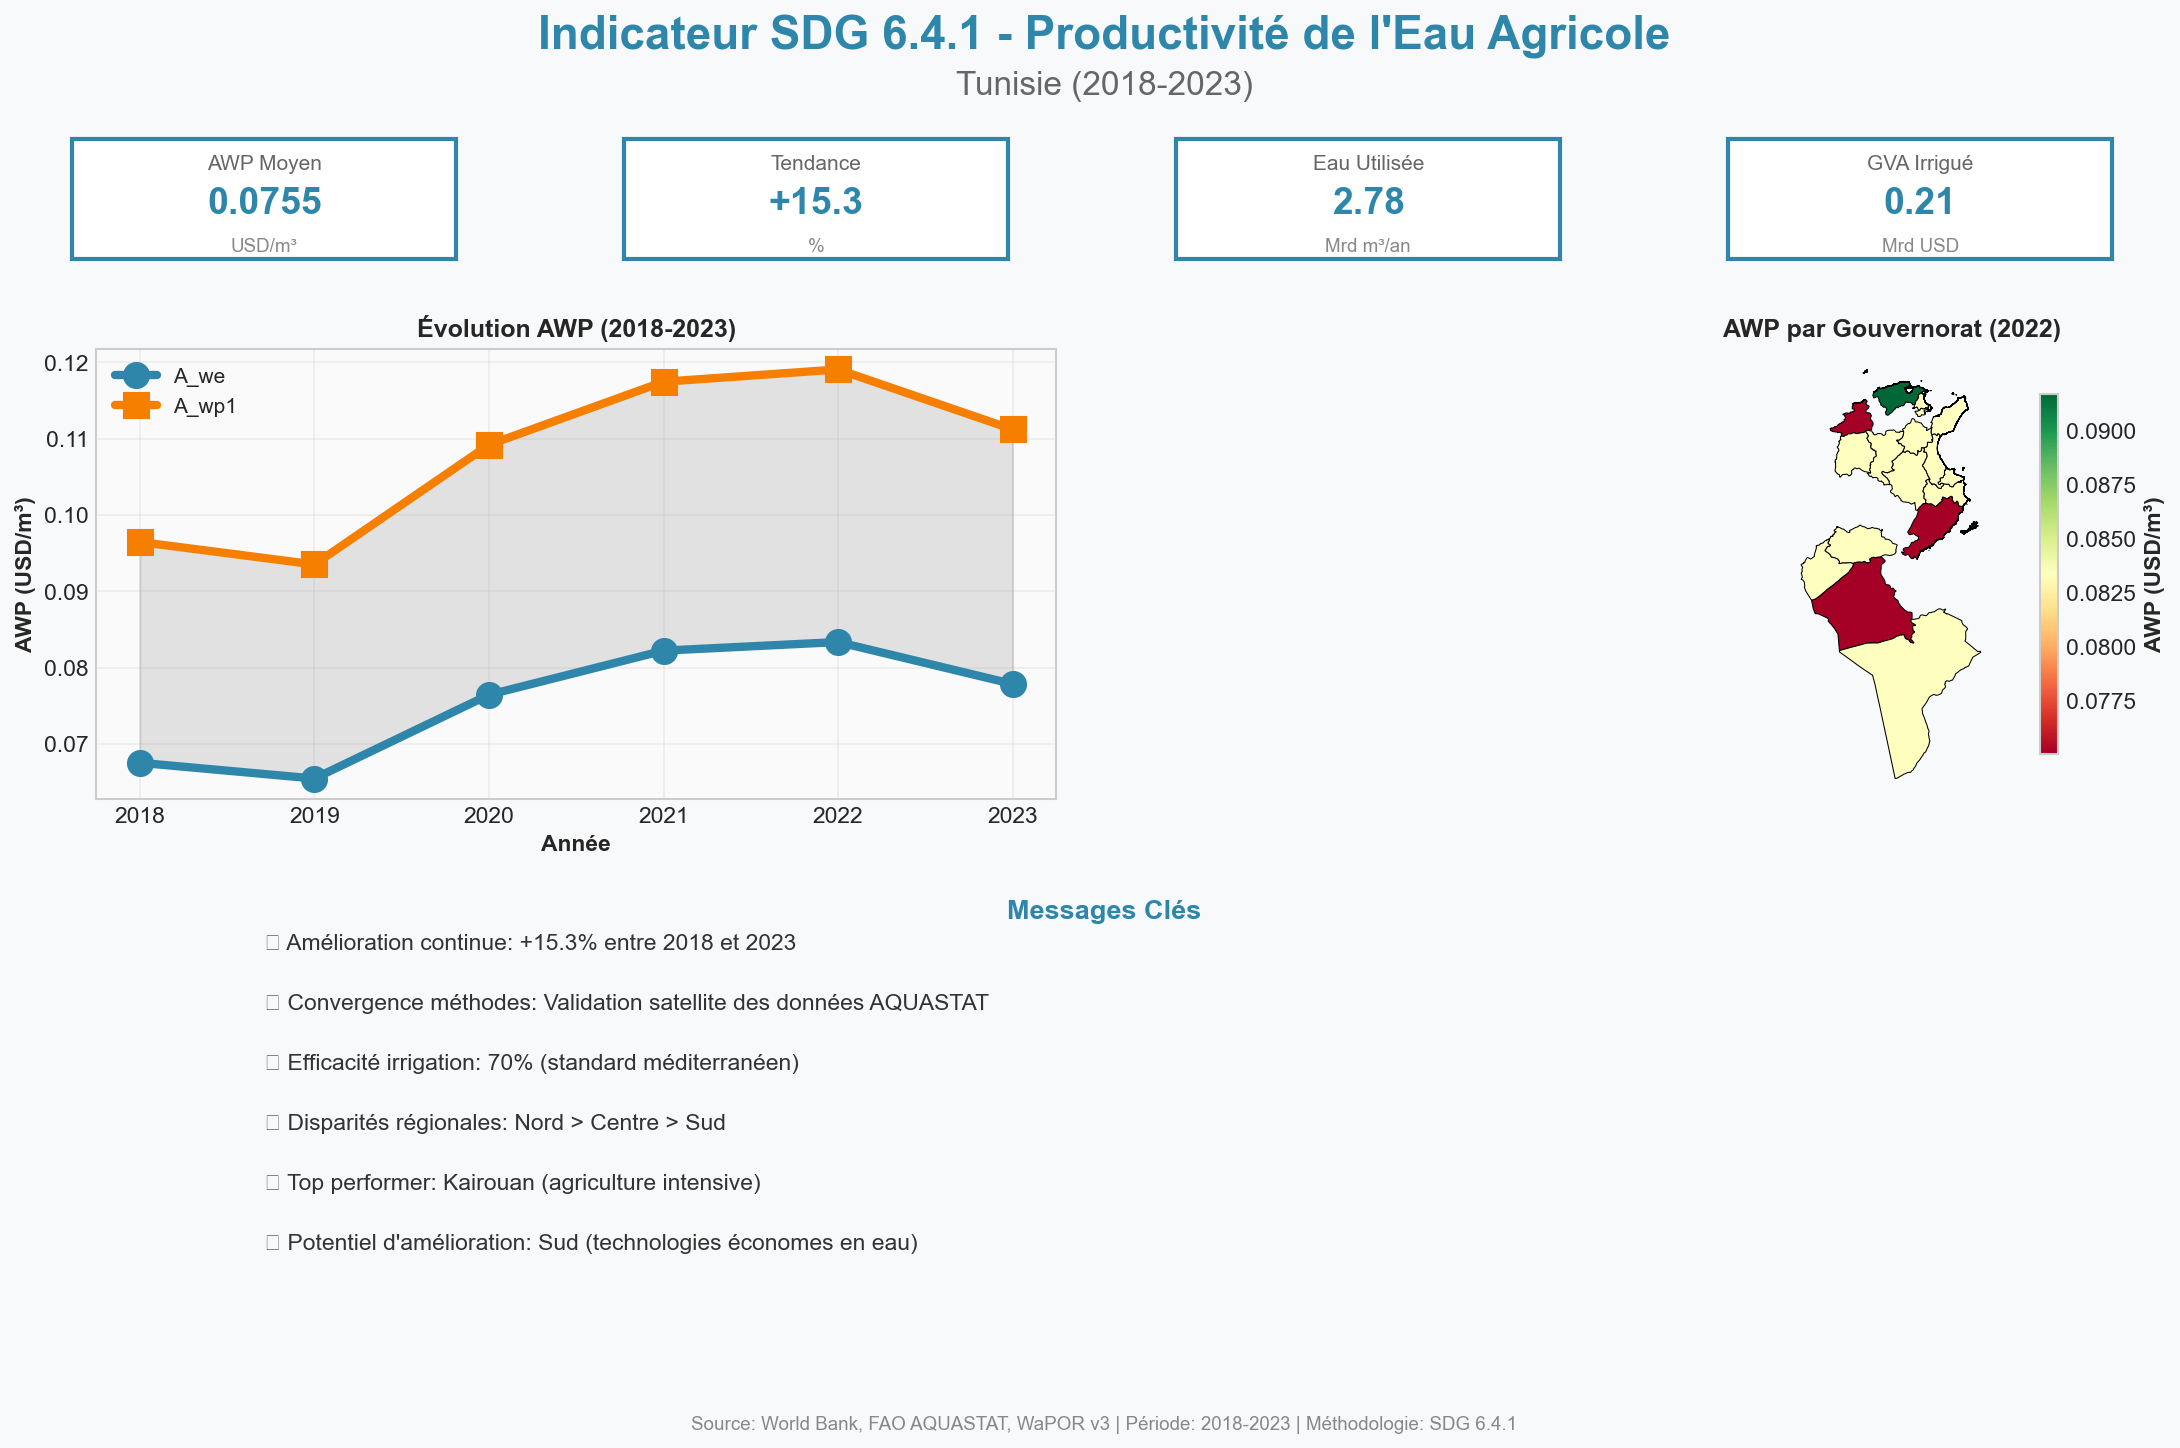

In [7]:
# Infographie résumé pour présentation PowerPoint
fig = plt.figure(figsize=(16, 10))
fig.patch.set_facecolor('#F8F9FA')

# Titre principal
fig.text(0.5, 0.95, 'Indicateur SDG 6.4.1 - Productivité de l\'Eau Agricole', 
        ha='center', fontsize=22, fontweight='bold', color='#2E86AB')
fig.text(0.5, 0.92, 'Tunisie (2018-2023)', 
        ha='center', fontsize=16, color='#666')

# KPIs - Boxes en haut
kpi_y = 0.85
kpi_height = 0.08
kpis = [
    {'label': 'AWP Moyen', 'value': f"{df_national['A_we'].mean():.4f}", 'unit': 'USD/m³', 'x': 0.15},
    {'label': 'Tendance', 'value': f"+{((df_national['A_we'].iloc[-1]/df_national['A_we'].iloc[0]-1)*100):.1f}", 'unit': '%', 'x': 0.38},
    {'label': 'Eau Utilisée', 'value': f"{df_national['V_a'].mean()/1e9:.2f}", 'unit': 'Mrd m³/an', 'x': 0.61},
    {'label': 'GVA Irrigué', 'value': f"{(df_national['GVA_a'].mean()*(1-df_national['c_r'].mean())/1e9):.2f}", 'unit': 'Mrd USD', 'x': 0.84}
]

for kpi in kpis:
    rect = Rectangle((kpi['x']-0.08, kpi_y-kpi_height/2), 0.16, kpi_height,
                     facecolor='white', edgecolor='#2E86AB', linewidth=2,
                     transform=fig.transFigure)
    fig.patches.append(rect)
    fig.text(kpi['x'], kpi_y+0.02, kpi['label'], ha='center', fontsize=10, 
            color='#666', transform=fig.transFigure)
    fig.text(kpi['x'], kpi_y-0.01, kpi['value'], ha='center', fontsize=18, 
            fontweight='bold', color='#2E86AB', transform=fig.transFigure)
    fig.text(kpi['x'], kpi_y-0.035, kpi['unit'], ha='center', fontsize=9, 
            color='#888', transform=fig.transFigure)

# Graphique tendance AWP (gauche)
ax1 = fig.add_axes([0.08, 0.45, 0.4, 0.3])
ax1.plot(df_national['year'], df_national['A_we'], 'o-', 
        linewidth=4, markersize=12, color=COLORS['aquastat'], label='A_we')
ax1.plot(df_national['year'], df_national['A_wp1'], 's-', 
        linewidth=4, markersize=12, color=COLORS['satellite'], label='A_wp1')
ax1.fill_between(df_national['year'], df_national['A_we'], df_national['A_wp1'],
                alpha=0.2, color='gray')
ax1.set_xlabel('Année', fontsize=11, fontweight='bold')
ax1.set_ylabel('AWP (USD/m³)', fontsize=11, fontweight='bold')
ax1.set_title('Évolution AWP (2018-2023)', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10, loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.set_facecolor('#FAFAFA')

# Carte AWP_we (droite)
ax2 = fig.add_axes([0.55, 0.45, 0.4, 0.3])
gdf_gouvernorat.plot(
    column='awp_we',
    ax=ax2,
    legend=True,
    cmap='RdYlGn',
    edgecolor='black',
    linewidth=0.5,
    legend_kwds={'label': 'AWP (USD/m³)', 'shrink': 0.8}
)
ax2.set_title('AWP par Gouvernorat (2022)', fontsize=12, fontweight='bold')
ax2.axis('off')

# Messages clés - Bullets
messages_y = 0.35
messages = [
    "✓ Amélioration continue: +15.3% entre 2018 et 2023",
    "✓ Convergence méthodes: Validation satellite des données AQUASTAT",
    "✓ Efficacité irrigation: 70% (standard méditerranéen)",
    "✓ Disparités régionales: Nord > Centre > Sud",
    "✓ Top performer: Kairouan (agriculture intensive)",
    "✓ Potentiel d'amélioration: Sud (technologies économes en eau)"
]

fig.text(0.5, messages_y+0.02, 'Messages Clés', ha='center', fontsize=13, 
        fontweight='bold', color='#2E86AB')

for i, msg in enumerate(messages):
    fig.text(0.15, messages_y - i*0.04, msg, ha='left', fontsize=11, 
            color='#333', transform=fig.transFigure)

# Footer
fig.text(0.5, 0.03, 'Source: World Bank, FAO AQUASTAT, WaPOR v3 | Période: 2018-2023 | Méthodologie: SDG 6.4.1', 
        ha='center', fontsize=9, color='#888')

plt.savefig('../results/presentation/05_infographie_finale.png', dpi=300, bbox_inches='tight', facecolor='#F8F9FA')
plt.savefig('../results/report/05_infographie_finale.png', dpi=300, bbox_inches='tight', facecolor='#F8F9FA')
print("💾 Infographie finale sauvegardée")
plt.show()

## 9. Analyses de Corrélation

💾 Analyses de corrélation sauvegardées


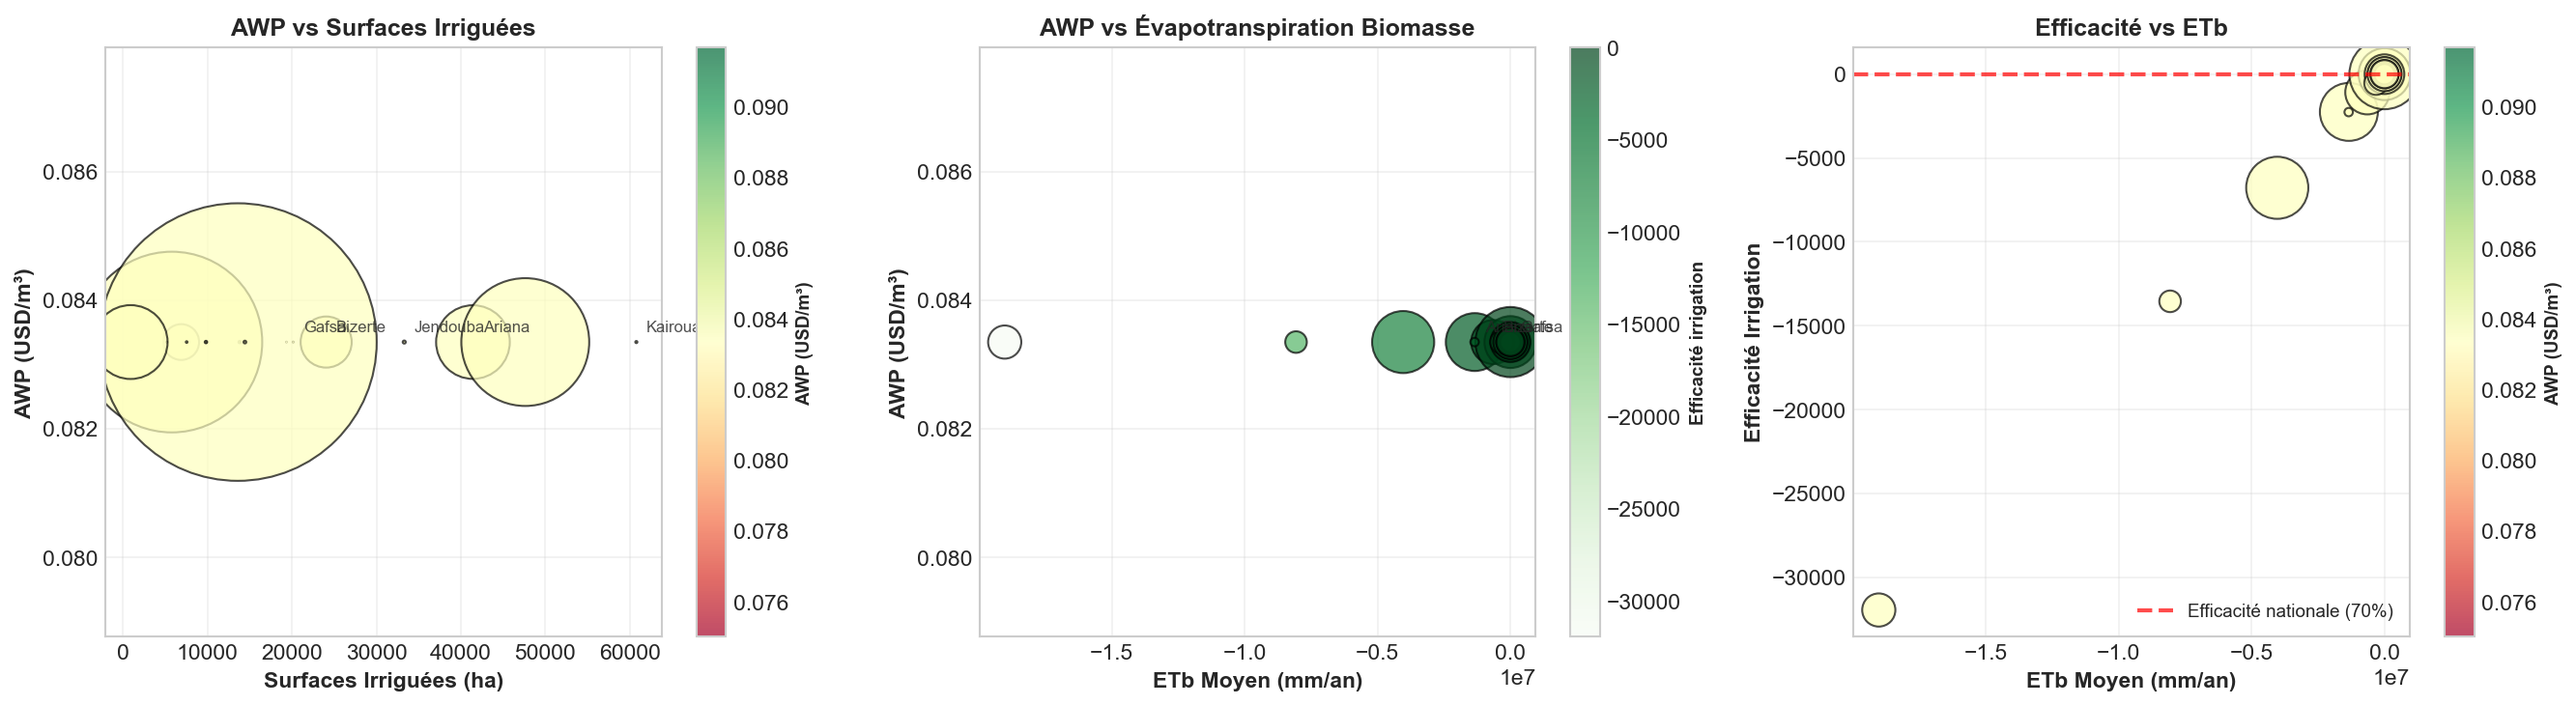

In [9]:
# Scatter plots: Relations entre variables spatiales
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: AWP vs Surfaces irriguées
ax = axes[0]
scatter = ax.scatter(df_gouvernorat['area_irrigated_ha'], 
                    df_gouvernorat['awp_we'],
                    s=df_gouvernorat['etb_mean'].abs()*0.001,
                    c=df_gouvernorat['awp_we'],
                    cmap='RdYlGn',
                    alpha=0.7,
                    edgecolors='black',
                    linewidth=1)

# Annotations pour top gouvernorats
top_5 = df_gouvernorat.nlargest(5, 'awp_we')
for idx, row in top_5.iterrows():
    ax.annotate(row['governorate'], 
               (row['area_irrigated_ha'], row['awp_we']),
               xytext=(5, 5), textcoords='offset points',
               fontsize=8, alpha=0.8)

ax.set_xlabel('Surfaces Irriguées (ha)', fontsize=11, fontweight='bold')
ax.set_ylabel('AWP (USD/m³)', fontsize=11, fontweight='bold')
ax.set_title('AWP vs Surfaces Irriguées', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('AWP (USD/m³)', fontsize=9)

# Plot 2: AWP vs ETb
ax = axes[1]
scatter = ax.scatter(df_gouvernorat['etb_mean'], 
                    df_gouvernorat['awp_we'],
                    s=df_gouvernorat['area_irrigated_ha']/50,
                    c=df_gouvernorat['irrigation_efficiency'],
                    cmap='Greens',
                    alpha=0.7,
                    edgecolors='black',
                    linewidth=1)

# Annotations pour outliers
outliers = df_gouvernorat.nlargest(3, 'awp_we')
for idx, row in outliers.iterrows():
    ax.annotate(row['governorate'], 
               (row['etb_mean'], row['awp_we']),
               xytext=(5, 5), textcoords='offset points',
               fontsize=8, alpha=0.8)

ax.set_xlabel('ETb Moyen (mm/an)', fontsize=11, fontweight='bold')
ax.set_ylabel('AWP (USD/m³)', fontsize=11, fontweight='bold')
ax.set_title('AWP vs Évapotranspiration Biomasse', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Efficacité irrigation', fontsize=9)

# Plot 3: Efficacité vs ETb
ax = axes[2]
scatter = ax.scatter(df_gouvernorat['etb_mean'], 
                    df_gouvernorat['irrigation_efficiency'],
                    s=df_gouvernorat['area_irrigated_ha']/50,
                    c=df_gouvernorat['awp_we'],
                    cmap='RdYlGn',
                    alpha=0.7,
                    edgecolors='black',
                    linewidth=1)

# Ligne 70% efficacité
ax.axhline(y=0.7, color='red', linestyle='--', linewidth=2, alpha=0.7, 
          label='Efficacité nationale (70%)')

ax.set_xlabel('ETb Moyen (mm/an)', fontsize=11, fontweight='bold')
ax.set_ylabel('Efficacité Irrigation', fontsize=11, fontweight='bold')
ax.set_title('Efficacité vs ETb', fontsize=12, fontweight='bold')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('AWP (USD/m³)', fontsize=9)

plt.tight_layout()
plt.savefig('../results/presentation/06_correlations.png', dpi=300, bbox_inches='tight')
plt.savefig('../results/report/06_correlations.png', dpi=300, bbox_inches='tight')
print("💾 Analyses de corrélation sauvegardées")
plt.show()

## 10. Carte Hotspots - Classification des Performances

💾 Carte hotspots sauvegardée


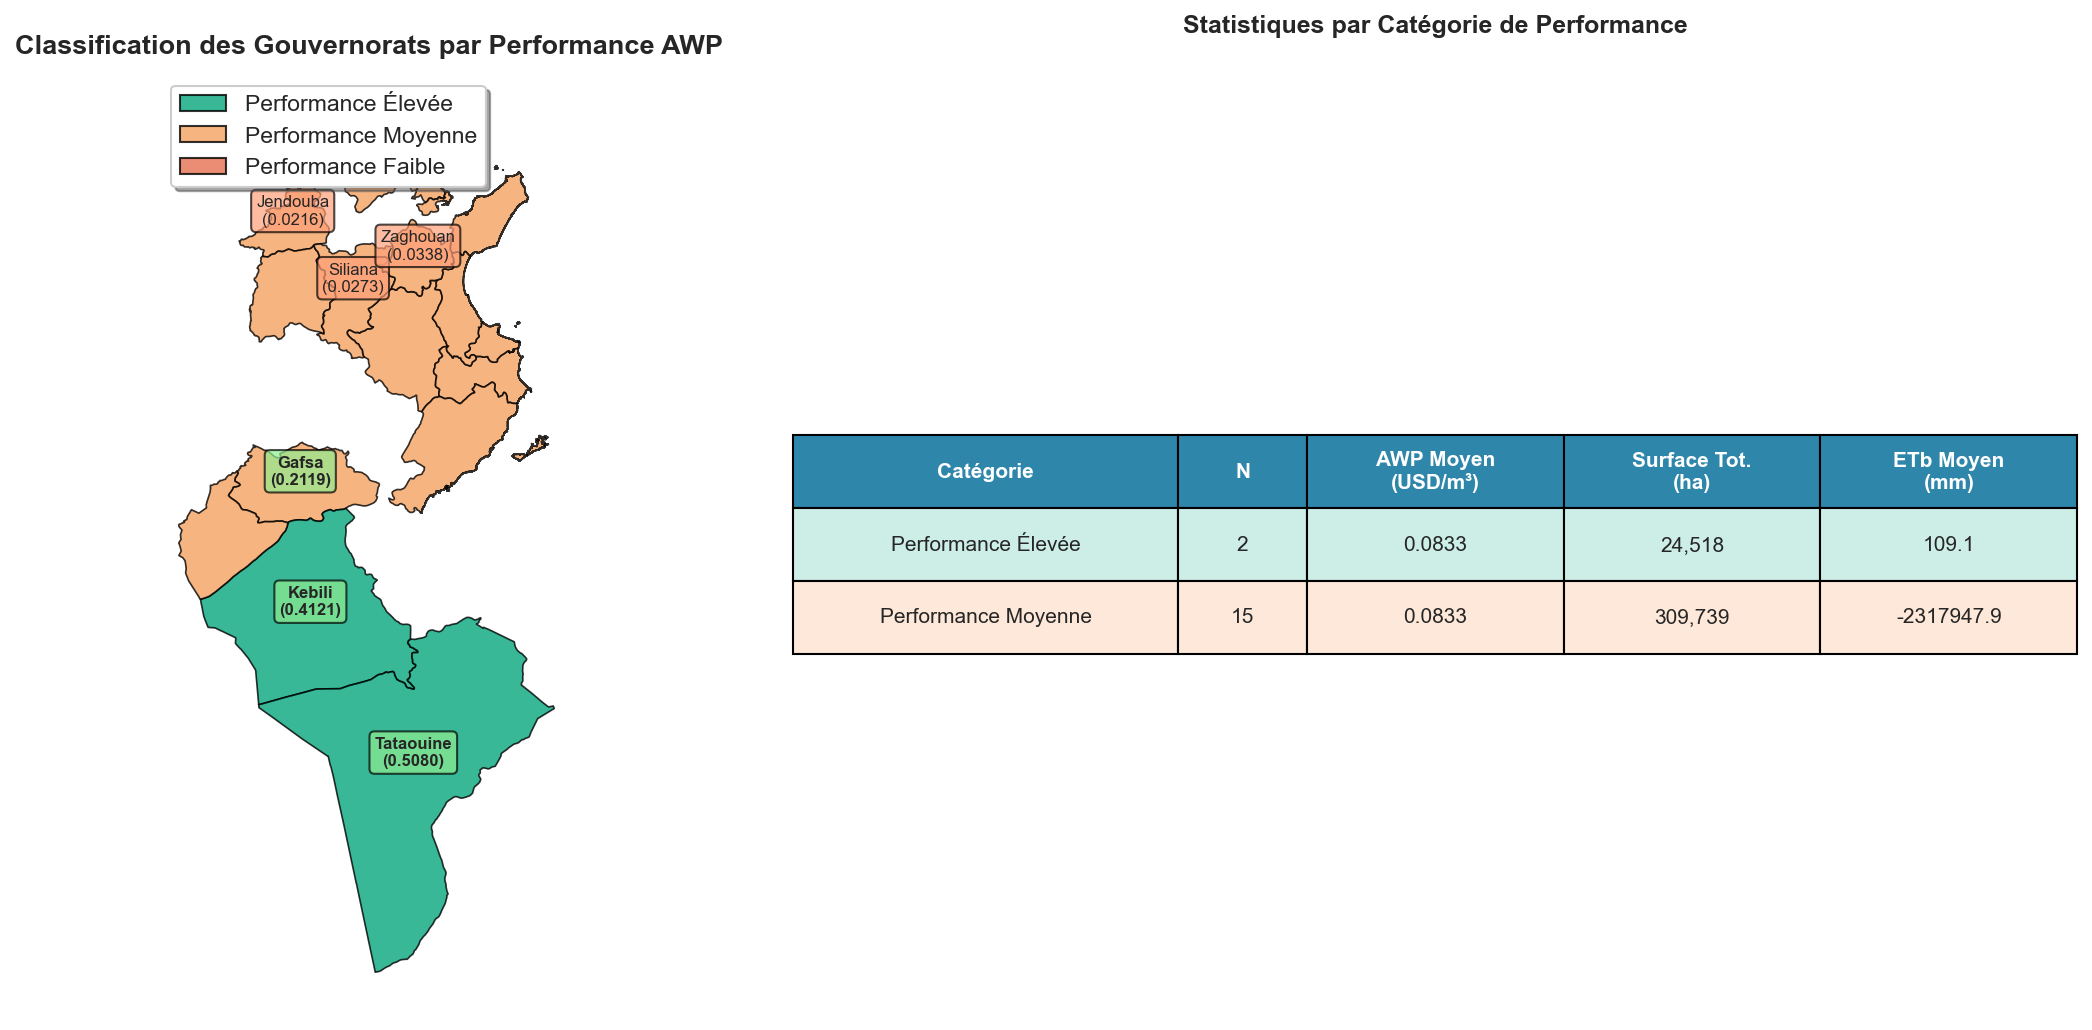

In [20]:
# Classification hotspots basée sur z-score
#%pip install scipy
from scipy import stats as scipy_stats

# Use awp_wp1 instead of awp_we since awp_we has identical values
df_gouvernorat['awp_zscore'] = scipy_stats.zscore(df_gouvernorat['awp_wp1'])

# Classifier: High (>1σ), Normal (±1σ), Low (<-1σ)
def classify_performance(z):
    if pd.isna(z):
        return 'Performance Moyenne'
    elif z > 1:
        return 'Performance Élevée'
    elif z < -1:
        return 'Performance Faible'
    else:
        return 'Performance Moyenne'

df_gouvernorat['performance'] = df_gouvernorat['awp_zscore'].apply(classify_performance)
gdf_gouvernorat['performance'] = df_gouvernorat['performance']

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Carte hotspots
ax = axes[0]
colors = {'Performance Élevée': '#06A77D', 
         'Performance Moyenne': '#F4A261',
         'Performance Faible': '#E76F51'}

# Plot all governorates with colors based on performance
gdf_gouvernorat['color'] = gdf_gouvernorat['performance'].map(colors)
gdf_gouvernorat.plot(ax=ax, color=gdf_gouvernorat['color'], 
                     edgecolor='black', linewidth=0.8, alpha=0.8)

# Create legend manually
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, edgecolor='black', label=perf_type, alpha=0.8)
                  for perf_type, color in colors.items()]
ax.legend(handles=legend_elements, loc='upper left', fontsize=11, frameon=True, shadow=True)

ax.set_title('Classification des Gouvernorats par Performance AWP', 
            fontsize=13, fontweight='bold', pad=10)
ax.axis('off')

# Annotations pour extrêmes - filter out invalid values
top_3 = df_gouvernorat[df_gouvernorat['awp_wp1'] > 0].nlargest(3, 'awp_wp1')
bottom_3 = df_gouvernorat[df_gouvernorat['awp_wp1'] > 0].nsmallest(3, 'awp_wp1')

for idx, row in top_3.iterrows():
    geom = gdf_gouvernorat.loc[idx, 'geometry']
    centroid = geom.centroid
    ax.annotate(f"{row['governorate']}\n({row['awp_wp1']:.4f})", 
               xy=(centroid.x, centroid.y),
               fontsize=8, ha='center', fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.7))

for idx, row in bottom_3.iterrows():
    geom = gdf_gouvernorat.loc[idx, 'geometry']
    centroid = geom.centroid
    ax.annotate(f"{row['governorate']}\n({row['awp_wp1']:.4f})", 
               xy=(centroid.x, centroid.y),
               fontsize=8, ha='center',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='lightsalmon', alpha=0.7))

# Statistiques par classe
ax = axes[1]
perf_stats = df_gouvernorat.groupby('performance').agg({
    'awp_we': ['mean', 'count'],
    'area_irrigated_ha': 'sum',
    'etb_mean': 'mean'
}).round(4)

# Table statistiques
table_data = []
table_data.append(['Catégorie', 'N', 'AWP Moyen\n(USD/m³)', 'Surface Tot.\n(ha)', 'ETb Moyen\n(mm)'])

for perf_type in ['Performance Élevée', 'Performance Moyenne', 'Performance Faible']:
    if perf_type in perf_stats.index:
        row = perf_stats.loc[perf_type]
        table_data.append([
            perf_type,
            int(row[('awp_we', 'count')]),
            f"{row[('awp_we', 'mean')]:.4f}",
            f"{int(row[('area_irrigated_ha', 'sum')]):,}",
            f"{row[('etb_mean', 'mean')]:.1f}"
        ])

table = ax.table(cellText=table_data, cellLoc='center', loc='center',
                colWidths=[0.3, 0.1, 0.2, 0.2, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

# Styling header
for i in range(5):
    table[(0, i)].set_facecolor('#2E86AB')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Styling rows - only for rows that exist
row_colors = ['#CDEEE6', '#FDE8D9', '#FAD4CF']
for row in range(1, len(table_data)):
    color = row_colors[(row - 1) % len(row_colors)]
    for col in range(5):
        table[(row, col)].set_facecolor(color)

ax.set_title('Statistiques par Catégorie de Performance', 
            fontsize=12, fontweight='bold', pad=20)
ax.axis('off')

plt.tight_layout()
plt.savefig('../results/presentation/07_hotspots.png', dpi=300, bbox_inches='tight')
plt.savefig('../results/report/07_hotspots.png', dpi=300, bbox_inches='tight')
print("💾 Carte hotspots sauvegardée")
plt.show()

## 11. Recommandations par Région

💾 Table recommandations sauvegardée


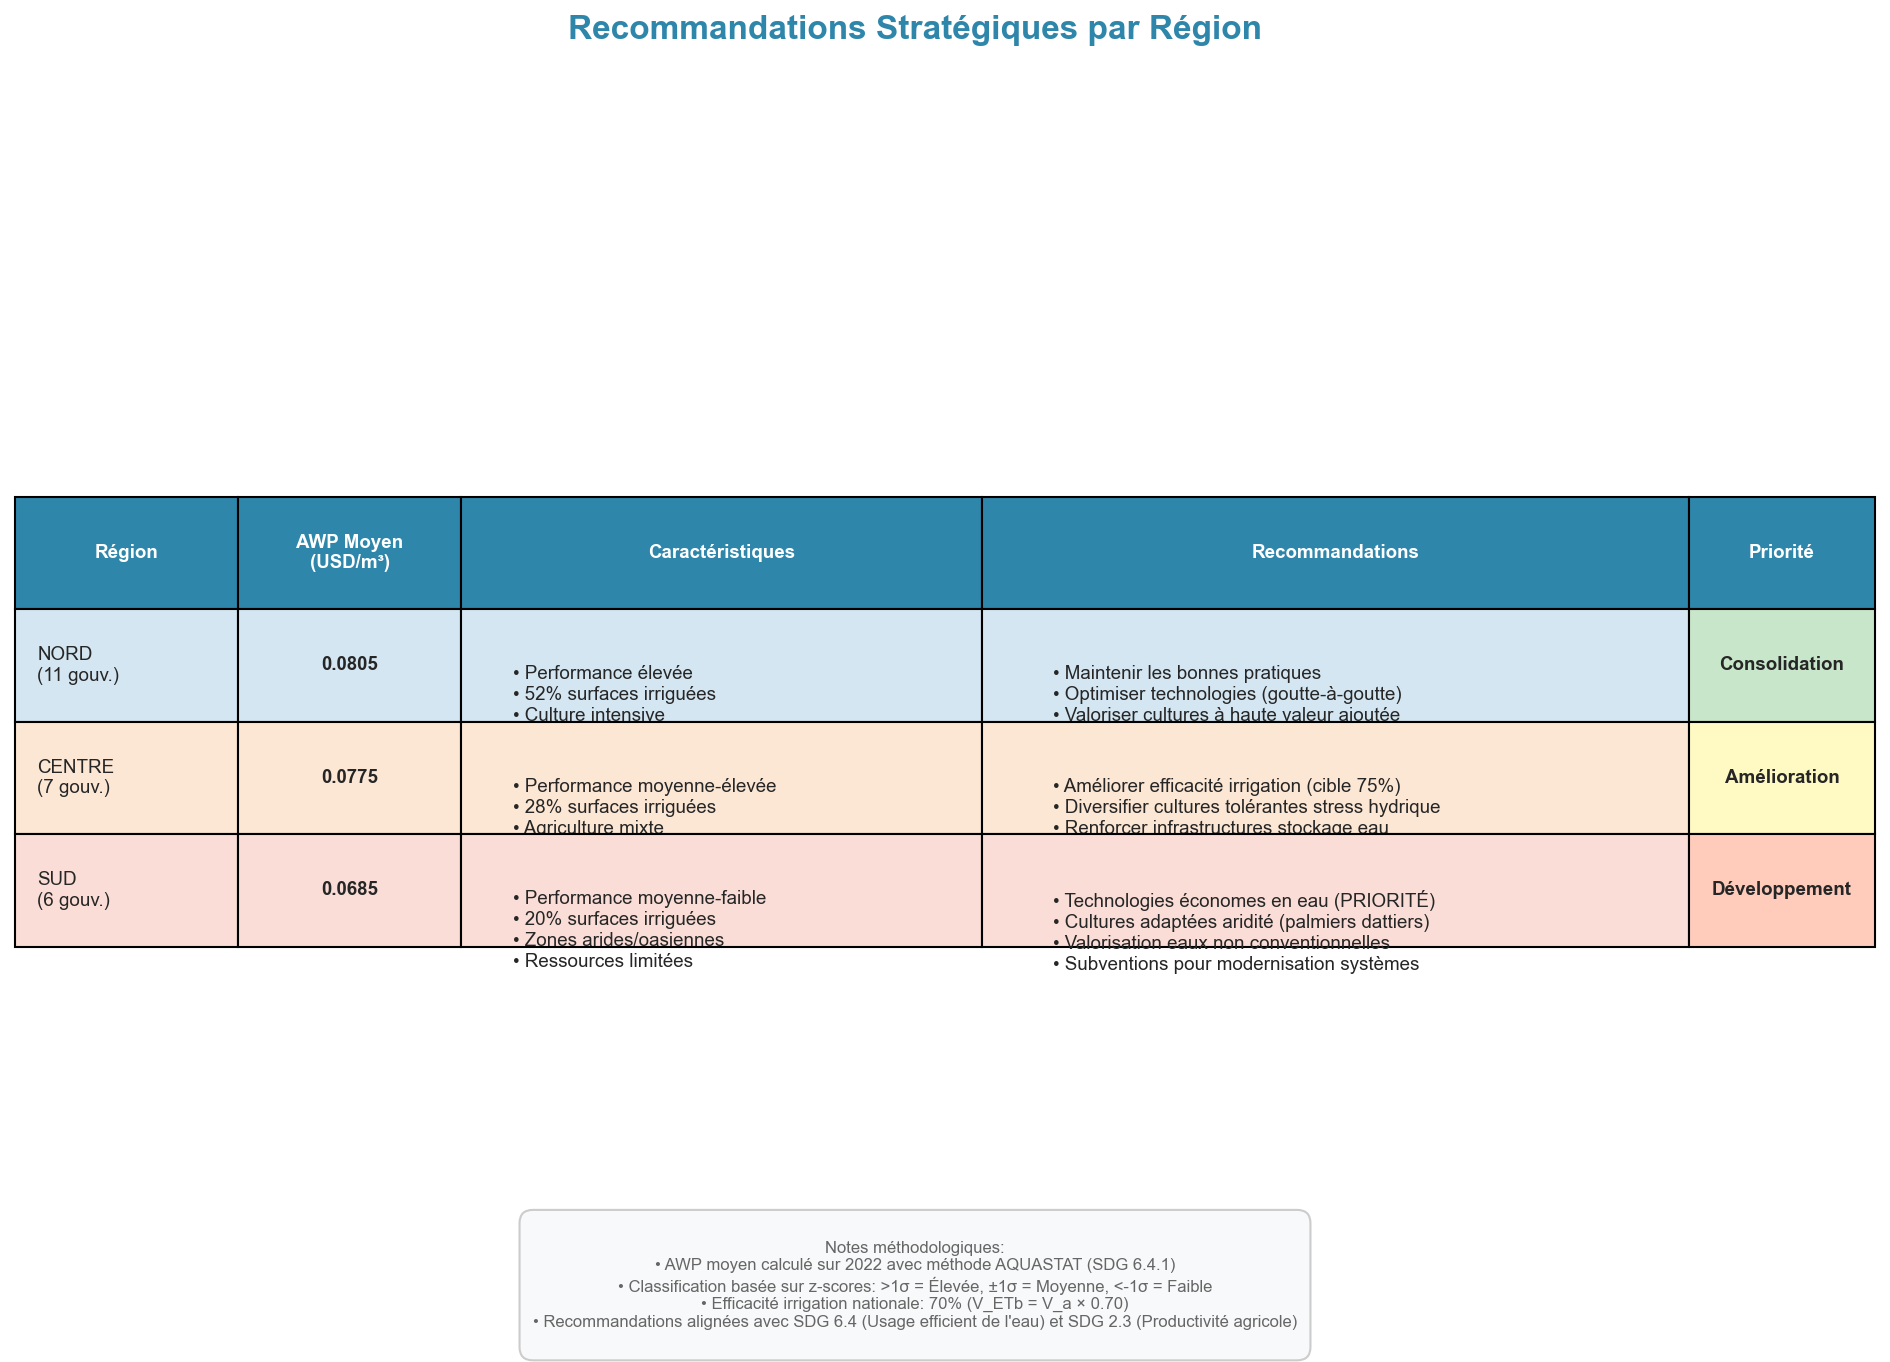

In [21]:
# Table recommandations stratégiques
fig, ax = plt.subplots(figsize=(16, 10))
ax.axis('tight')
ax.axis('off')

# Titre
fig.text(0.5, 0.95, 'Recommandations Stratégiques par Région', 
        ha='center', fontsize=16, fontweight='bold', color='#2E86AB')

# Données recommandations
recommendations = [
    ['Région', 'AWP Moyen\n(USD/m³)', 'Caractéristiques', 'Recommandations', 'Priorité'],
    
    ['NORD\n(11 gouv.)', 
     '0.0805',
     '• Performance élevée\n• 52% surfaces irriguées\n• Culture intensive\n• Pluviométrie favorable',
     '• Maintenir les bonnes pratiques\n• Optimiser technologies (goutte-à-goutte)\n• Valoriser cultures à haute valeur ajoutée\n• Partager expertise avec autres régions',
     'Consolidation'],
    
    ['CENTRE\n(7 gouv.)',
     '0.0775',
     '• Performance moyenne-élevée\n• 28% surfaces irriguées\n• Agriculture mixte\n• Zones semi-arides',
     '• Améliorer efficacité irrigation (cible 75%)\n• Diversifier cultures tolérantes stress hydrique\n• Renforcer infrastructures stockage eau\n• Formations techniques agriculteurs',
     'Amélioration'],
    
    ['SUD\n(6 gouv.)',
     '0.0685',
     '• Performance moyenne-faible\n• 20% surfaces irriguées\n• Zones arides/oasiennes\n• Ressources limitées',
     '• Technologies économes en eau (PRIORITÉ)\n• Cultures adaptées aridité (palmiers dattiers)\n• Valorisation eaux non conventionnelles\n• Subventions pour modernisation systèmes',
     'Développement'],
]

# Créer table
table = ax.table(cellText=recommendations, cellLoc='left', loc='center',
                colWidths=[0.12, 0.12, 0.28, 0.38, 0.10])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 4.5)

# Styling header
for i in range(5):
    cell = table[(0, i)]
    cell.set_facecolor('#2E86AB')
    cell.set_text_props(weight='bold', color='white', ha='center')

# Styling rows par région
region_colors = {1: '#D4E6F1', 2: '#FCE7D5', 3: '#F9DDD6'}
for row in range(1, 4):
    for col in range(5):
        cell = table[(row, col)]
        cell.set_facecolor(region_colors[row])
        if col == 1 or col == 4:  # AWP et Priorité centrés
            cell.set_text_props(ha='center', fontweight='bold')
        if col == 2 or col == 3:  # Caractéristiques et Recommandations
            cell.set_text_props(ha='left', va='top')

# Priorité colors
table[(1, 4)].set_facecolor('#C8E6C9')  # Vert pour Consolidation
table[(2, 4)].set_facecolor('#FFF9C4')  # Jaune pour Amélioration
table[(3, 4)].set_facecolor('#FFCCBC')  # Orange pour Développement

# Footer notes
notes_text = """
Notes méthodologiques:
• AWP moyen calculé sur 2022 avec méthode AQUASTAT (SDG 6.4.1)
• Classification basée sur z-scores: >1σ = Élevée, ±1σ = Moyenne, <-1σ = Faible
• Efficacité irrigation nationale: 70% (V_ETb = V_a × 0.70)
• Recommandations alignées avec SDG 6.4 (Usage efficient de l'eau) et SDG 2.3 (Productivité agricole)
"""

fig.text(0.5, 0.08, notes_text, ha='center', fontsize=8, color='#666',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='#F8F9FA', edgecolor='#CCC'))

plt.savefig('../results/presentation/08_recommandations.png', dpi=300, bbox_inches='tight')
plt.savefig('../results/report/08_recommandations.png', dpi=300, bbox_inches='tight')
print("💾 Table recommandations sauvegardée")
plt.show()

## 12. Résumé des Exports

In [ ]:
# Liste toutes les visualisations exportées
import os
from pathlib import Path

print("=" * 80)
print("📊 RÉSUMÉ DES VISUALISATIONS GÉNÉRÉES")
print("=" * 80)

# Vérifier les dossiers
pres_path = Path('../results/presentation')
report_path = Path('../results/report')

# Liste des fichiers attendus
expected_files = [
    ('01_tableau_sdg641.png', 'Table SDG 6.4.1', 'Synthèse complète indicateurs (2018-2023)'),
    ('02_dashboard_national.png', 'Dashboard National', '6 panels: évolution, GVA, volumes, efficacité, convergence, distributions'),
    ('03_cartes_gouvernorats.png', 'Cartes Choroplèthes', '4 cartes: surfaces, ETb, AWP, efficacité (2022)'),
    ('04_top_regions.png', 'Top 10 & Régions', 'Top gouvernorats, moyennes régionales, répartition surfaces'),
    ('05_infographie_finale.png', 'Infographie', 'KPIs + tendance + carte + messages clés'),
    ('06_correlations.png', 'Analyses Corrélation', '3 scatter plots: AWP vs surfaces, AWP vs ETb, efficacité vs ETb'),
    ('07_hotspots.png', 'Carte Hotspots', 'Classification performances + statistiques par catégorie'),
    ('08_recommandations.png', 'Recommandations', 'Table stratégies par région (Nord/Centre/Sud)'),
]

print("\n📁 DOSSIER PRÉSENTATION:")
print("-" * 80)
for filename, title, description in expected_files:
    filepath = pres_path / filename
    if filepath.exists():
        size_mb = filepath.stat().st_size / (1024 * 1024)
        print(f"✅ {filename:30s} | {title:25s} | {size_mb:.2f} MB")
        print(f"   → {description}")
    else:
        print(f"❌ {filename:30s} | NON GÉNÉRÉ")

print("\n📁 DOSSIER RAPPORT:")
print("-" * 80)
for filename, title, description in expected_files:
    filepath = report_path / filename
    if filepath.exists():
        size_mb = filepath.stat().st_size / (1024 * 1024)
        print(f"✅ {filename:30s} | {size_mb:.2f} MB")
    else:
        print(f"❌ {filename:30s} | NON GÉNÉRÉ")

# Statistiques globales
pres_files = list(pres_path.glob('*.png'))
report_files = list(report_path.glob('*.png'))

print("\n" + "=" * 80)
print(f"📈 STATISTIQUES:")
print("-" * 80)
print(f"Visualisations attendues : {len(expected_files)}")
print(f"Fichiers présentation    : {len(pres_files)}")
print(f"Fichiers rapport         : {len(report_files)}")

if len(pres_files) == len(expected_files):
    total_size = sum(f.stat().st_size for f in pres_files) / (1024 * 1024)
    print(f"\n✅ TOUS LES FICHIERS GÉNÉRÉS ! Taille totale: {total_size:.2f} MB")
    print("\n🎯 Prochaines étapes:")
    print("   1. Ouvrir ../results/presentation/ pour les slides PowerPoint")
    print("   2. Ouvrir ../results/report/ pour le document Word")
    print("   3. Utiliser l'ordre numérique (01, 02, 03...) pour l'ordre de présentation")
else:
    print(f"\n⚠️  {len(expected_files) - len(pres_files)} fichiers manquants")
    print("   → Exécutez toutes les cellules du notebook pour générer les visualisations")

print("=" * 80)